In [1]:
import pandas as pd
import numpy as np

In [44]:
# calculate the Euclidean distance between two vectors
# Euclidean Distance
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

# Manhattan Distance (L1 Norm)
def manhattan_distance(p, q):
    return np.sum(np.abs(p - q))

# Minkowski Distance
def minkowski_distance(p, q, p_value):
    return np.sum(np.abs(p - q) ** p_value) ** (1 / p_value)

In [55]:
# Define two vectors
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])
# Call the function
distance = euclidean_distance(vector1, vector2)

print("Euclidean distance between the two vectors:", distance)

Euclidean distance between the two vectors: 5.196152422706632


In [39]:
import numpy as np
# Define the data
data = [
    [2.7810836, 2.550537003, 0],
    [1.465489372, 2.362125076, 0],
    [3.396561688, 4.400293529, 0],
    [1.38807019, 1.850220317, 0],
    [3.06407232, 3.005305973, 0],
    [7.627531214, 2.759262235, 1],
    [5.332441248, 2.088626775, 1],
    [6.922596716, 1.77106367, 1],
    [8.675418651, -0.242068655, 1],
    [7.673756466, 3.508563011, 1]
]
# Convert the data to a numpy array
data_np = np.array(data)

# Split the data into X and Y
X = data_np[:, :2]  # Select all rows and the first two columns
Y = data_np[:, 2]   # Select all rows and the third column

# Display the X and Y arrays to verify
print("X array:")
print(X)
print("\nY array:")
print(Y)


X array:
[[ 2.7810836   2.550537  ]
 [ 1.46548937  2.36212508]
 [ 3.39656169  4.40029353]
 [ 1.38807019  1.85022032]
 [ 3.06407232  3.00530597]
 [ 7.62753121  2.75926224]
 [ 5.33244125  2.08862677]
 [ 6.92259672  1.77106367]
 [ 8.67541865 -0.24206865]
 [ 7.67375647  3.50856301]]

Y array:
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


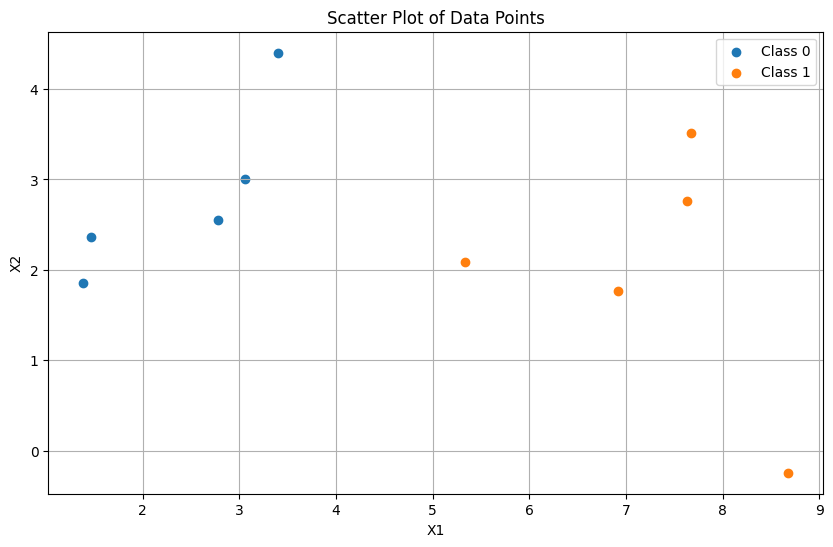

In [43]:
import matplotlib.pyplot as plt
# Plot the data
plt.figure(figsize=(10, 6))

# Separate the data points based on their labels
for label in np.unique(Y):
    plt.scatter(X[Y == label][:, 0], X[Y == label][:, 1], label=f'Class {int(label)}')

# Add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [52]:
from collections import Counter
# kNN algorithm
def k_nearest_neighbors(X, Y, query_point, k):
    distances = []
    
    # Calculate distances from the query point to all other points
    for i, point in enumerate(X):
        distance = euclidean_distance(point, query_point)
        distances.append((distance, Y[i]))
    
    # Sort distances in ascending order
    distances.sort(key=lambda x: x[0])
    
    # Select the k nearest neighbors
    k_nearest = distances[:k]
    
    # Get the labels of the k nearest neighbors
    k_nearest_labels = [label for _, label in k_nearest]
    
    # Determine the most common label (majority vote)
    majority_vote = Counter(k_nearest_labels).most_common(1)
    
    return majority_vote[0][0]

# Define a query point
query_point = np.array([7.0, 3.0])

# Set the value of k
k = 3

# Predict the class for the query point
predicted_class = k_nearest_neighbors(X, Y, query_point, k)

print(f"The predicted class for the query point {query_point} is: {predicted_class}")

The predicted class for the query point [7. 3.] is: 1


The predicted class for the query point [3. 3.] is: 0


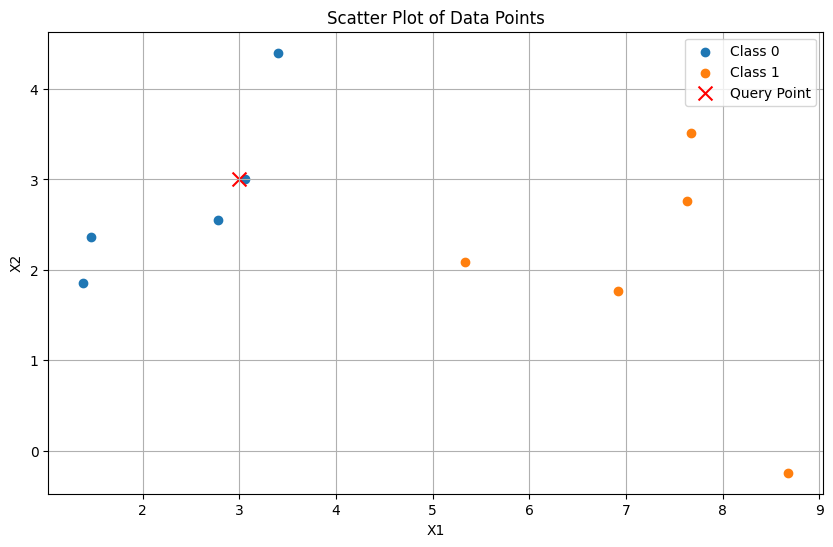

In [53]:
# Method to plot the data
def plot_data(X, Y, query_point=None):
    plt.figure(figsize=(10, 6))

    # Separate the data points based on their labels
    for label in np.unique(Y):
        plt.scatter(X[Y == label][:, 0], X[Y == label][:, 1], label=f'Class {int(label)}')

    # Plot the query point if provided
    if query_point is not None:
        plt.scatter(query_point[0], query_point[1], c='red', marker='x', s=100, label='Query Point')

    # Add labels and title
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Scatter Plot of Data Points')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Define the dataset
X = np.array([
    [2.7810836, 2.550537003],
    [1.465489372, 2.362125076],
    [3.396561688, 4.400293529],
    [1.38807019, 1.850220317],
    [3.06407232, 3.005305973],
    [7.627531214, 2.759262235],
    [5.332441248, 2.088626775],
    [6.922596716, 1.77106367],
    [8.675418651, -0.242068655],
    [7.673756466, 3.508563011]
])

Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Define a query point
query_point = np.array([3.0, 3.0])

# Set the value of k
k = 3

# Predict the class for the query point
predicted_class = k_nearest_neighbors(X, Y, query_point, k)
print(f"The predicted class for the query point {query_point} is: {predicted_class}")

# Plot the data with the query point
plot_data(X, Y, query_point)

In [10]:
import pandas as pd

# Specify the path to the CSV file
file_path = r'D:\MLDatasets\column_2C_weka.csv'

# Read the CSV file into a DataFrame
data_2C = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data is loaded correctly
print(data_2C.head())

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  


In [11]:
data_2C.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [12]:
data_2C.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [13]:
colnames_numeric = data_2C.columns[0:6]

In [14]:
#Scaling a data in always a good idea while using KNN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_2C[colnames_numeric] = scaler.fit_transform(data_2C[colnames_numeric])


In [15]:
data_2C.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,Abnormal
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,Abnormal
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,Abnormal
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,Abnormal
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,Abnormal


In [16]:
data_2C.shape

(310, 7)

In [17]:
df = data_2C.values.tolist()

In [18]:
#Breaking the data into training and test set
import random
def train_test_split(data, split, trainingSet = [], testSet = []):
    for x in range(len(data)):
        if random.random() < split:
            trainingSet.append(data[x])
        else:
            testSet.append(data[x])


In [19]:
trainingSet = []
testSet = []
split = 0.66
train_test_split(df, split, trainingSet, testSet)

In [20]:
len(trainingSet)

225

In [21]:
len(testSet)

85

In [22]:
#Define Euclidean distances
import math
def Euclideandist(x,xi, length):
    d = 0.0
    for i in range(length):
        d += pow(float(x[i])- float(xi[i]),2)
    return math.sqrt(d)

In [23]:
#Getting the K neighbours having the closest Euclidean distance to the test instance
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = Euclideandist(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [24]:
#After sorting the neighbours based on their respective classes, max voting to give the final class of the test instance
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)#Sorting it based on votes
	return sortedVotes[0][0] #Please note we need the class for the top voted class, hence [0][0]#

In [25]:
#Getting the accuracy
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [26]:
	# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))


> predicted='Normal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'


In [27]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 80.0%


In [28]:
#Implementing Naive Bayes using scikitlearn
trainingSet2 = pd.DataFrame(np.array(trainingSet).reshape(len(trainingSet),7), columns = data_2C.columns)
testSet2 = pd.DataFrame(np.array(testSet).reshape(len(testSet),7), columns = data_2C.columns)

In [29]:
trainingSet2.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.3556878816384216,0.5198998354211468,0.22917997405738216,0.25085730007495866,0.30746116406185287,0.02514838679683394,Abnormal
1,0.1245010390093278,0.2967831037196671,0.09857833418098988,0.14462935152805528,0.47664890731280163,0.03636497080423512,Abnormal
2,0.4116664786323362,0.5139322886296581,0.3229946578328597,0.30766053650983105,0.38609692495620795,0.017522903291025245,Abnormal
3,0.4161510431394515,0.5574138832291957,0.27125998782261546,0.2894358396770871,0.34182648376044333,0.05183807435900692,Abnormal
4,0.2272718673829266,0.2894793016852326,0.12812869472882338,0.24702205146767153,0.4095792932797552,0.04417277370515322,Abnormal


In [30]:
trainingSet2.dtypes

pelvic_incidence            object
pelvic_tilt numeric         object
lumbar_lordosis_angle       object
sacral_slope                object
pelvic_radius               object
degree_spondylolisthesis    object
class                       object
dtype: object

In [ ]:
#Even the numeric terms have been converted into an object. Hence need to reconvert

In [31]:
trainingSet2[colnames_numeric] = trainingSet2[colnames_numeric].apply(pd.to_numeric, errors = 'coerce', axis = 0)

In [32]:
trainingSet2.dtypes


pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [33]:
testSet2[colnames_numeric] = testSet2[colnames_numeric].apply(pd.to_numeric, errors = 'coerce', axis = 0)

In [34]:
testSet2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x_train,y_train = trainingSet2.loc[:,trainingSet2.columns != 'class'], trainingSet2.loc[:,'class']
x_test,y_test = testSet2.loc[:,testSet2.columns != 'class'], testSet2.loc[:,'class']


In [36]:
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

Prediction: ['Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal']
With KNN (K=3) accuracy is:  0.8
